<a href="https://colab.research.google.com/github/ladiaJeong/Going-Deeper-NLP-/blob/master/%5BGD_02%5D_%EB%A9%8B%EC%A7%84_%EB%8B%A8%EC%96%B4%EC%82%AC%EC%A0%84_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# KoNLPy, 그중에서도 가장 성능이 준수한 MeCab클래스를 활용

from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('코딩언어가더욱익숙해지고해석이가능한날이오겠죠'))

['코딩', '언어', '가', '더욱', '익숙', '해', '지', '고', '해석', '이', '가능', '한', '날', '이', '오', '겠죠']


## 데이터 다운로드 및 분석 

In [ ]:
# 데이터 다운로드 및 분석 

import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [ ]:
import os 
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file,"r") as f:
    raw = f.read().splitlines() #raw에 데이터가 있음^^ 
    
print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]:print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


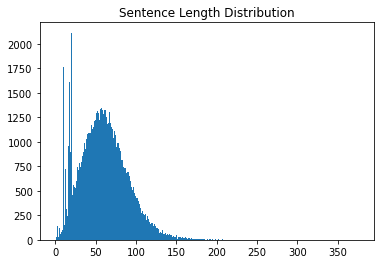

In [ ]:
min_len = 999
max_len = 0 
sum_len = 0 #초기설정 

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length # length가 최소값의 길이보다 작으면 최소값은 length
    if max_len < length: max_len = length
    sum_len += length # 하나씩 증가된 데이터를 더함
    
print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int) #np.zeros 0으로 초기화 된 배열 반환

for sen in raw:
    sentence_length[len(sen)-1] +=1
    
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()


    

In [ ]:
def check_sentence_with_length(raw,length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count +=1
            if count > 100: return
            
check_sentence_with_length(raw, 1)


’


In [ ]:
check_sentence_with_length(raw, 377)

throwaway 사용 후 버리는  / cell phone 이동 전화, 휴대폰  / be set to do 할 준비가 되어있다  / make one's debut 처음 소개되다  / convenience store 편의점   / shelve 선반, (상품) 진열대  / aisle 길다란 통로  / down the aisle from  이 있는 통로 아랫쪽에  / razor 면도기  / beef jerky 말린 쇠고기  / disposable camera 일회용 카메라  / seek 하려고 애쓰다  / emulate 에 지지 않으려고 애쓰다, 겨루다  / spur-of-the-moment 충동적인  / consumer 소비자  / purchase 구매, 구매품 번역 :


In [ ]:
check_sentence_with_length(raw, 60)

양측은 한 가지 즉, 한국인들은 오래 일하긴 하지만 반드시 효율적으로 일하는 것은 아니라는 데에는 동의한다.
류마티스성 관절염은 뼈가 연결되는 부위인 관절을 둘러싸고 있는 조직을 신체의 면역 체계가 공격하는 질병이다.
그리고 부시는 왜 이미 두 곳에서 대규모의 세계적 대치 상황에 몰두해 있는 때에 그 문제를 압박해들어갔는가?
save의 주체는 a Japanese business이고, 목적어 it는 Locky Company를 받는다.
"이렇게 서양 의약에 대해 강하게 망설이는 이유 중 하나는 부작용에 대한 우려입니다." 라고 그녀가 말했다.
많은 경우에 있어서, 흑인들은 그들이 현재 살고 있는 도시 빈곤지역으로 한 30년 전 쯤에 이주해 왔습니다.
"어떤 사람들은 자정에 근무를 마치고 오고, 어떤 이들은 사무실에 나가기 전에 몇개 홀을 돌고 싶어합니다."
"모든 사람들이 당신을 이상하게 바라본다면, 당신은 마치 질병을 갖고 있는 것 같은 기분을 느끼게 되겠죠."
기업, 대학, 정부 기관들은 대개 자신들의 컴퓨터와 외부세계 사이를 연결시켜주는 개별적인 통로를 갖고 있다.
환경 관련 상품과 서비스의 국제시장에서 아시아 지역만의 수요가 600억 달러를 초과할 것으로 예상되고 있다.
미세입자와 화학 물질에 의한 대기 오염과 고체 폐기물의 처리로 생긴 문제들도 또한 성장의 환경적 결과들이다.
미국에서의 음식 스타일에 많은 변화가 일어나고 있다. its는 the United States'를 대신한다.
인도네시아는 성공적인 5개년 개발계획에서의 급속한 경제성장으로 환경에 부담이 더해지고 있다는 것을 인정했다.
환경부의 공해통제국은 유해 폐기물을 통제하고, 그러한 통제는 새로운 공장의 설립 계획 단계에서부터 시작된다.
정부가 비밀을 유지할 수 있는 완벽한 장소, 그리고 전해진 바에 의하면, 범죄를 저지르기에 완벽한 장소이다.
look much more like  rather than ... ... 보다는 오히려 에 훨씬 더 흡사하다
그것은 바로 우리에게 저장된 지방을 일정한 

In [ ]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500 :
        print (idx+1)

11
19
21


In [ ]:
check_sentence_with_length(raw, 21)

미국과 영국의 과학자들이 악수를 했다.
인력은 기계에 의해 보강되어야만 했다.
"시장은 그들에게 넓게 열려 있습니다.
아디다스는 또 다른 이점도 갖고 있다.
공부를 위해서만 이용하겠다고 말입니다.
환경법규의 도입은 고통스러운 과정이다.
- 여보, 이쪽이야, 아니면 저쪽이야?
인도는 훨씬 늦게 게임에 뛰어 들었다.
요즘 대부분의 기업들이 그렇지 않은가?
카리스마적인 지도자들은 위험을 즐긴다.
우리가 하려고 하는 일의 모델은 없다.
정상 회담은 오늘 늦게 끝날 것입니다.
그리고 공화당의 추정은 절반만 맞았다.
하지만 증가하고 있는 노인 인구수에따라
민간부문에서 그런 일을 할 수는 없다고
금년초 이라크 정보부는 "사담 후세인:
실제로 이 방법은 만족스럽지가 못하다.
카자흐스탄으로부터 중국으로 입국하려다가
클립퍼 칩에 대한 이야기로 들어 가자.
북한의 무기 개발에 대한 CIA 보고서
어려움을 겪고 있는 멕시코 경제에 대한
그는 ''미국은 우리의 최악의 적이다.
수로가 오염되고 야생동물이 밀렵되었다.
이런 지역들을 보살피고 보호해야 한다.
학습 방법은 훨씬 더 흠칫한 것입니다.
포옹은 심장에 좋은 약 일 수 도 있다
(경찰은 심문을 위해 그를 구금했다.)
금년에는 이 숫자가 58%로 증가했다.
(금고를 뒤져 많은 서류를 가져갔다.)
김치는 열량은 적고 비타민은 풍부하다.
smear campaign (흑색선전)
아들은 아버지로부터 사업을 이어받는다.
그것은 한계 효과가 나타나는 시기이다.
"사람들에게 선택권이 주어져야 합니다.
로야 저가는 임시 의사 결정 집단이다.
160석이 여성 대표들에게 보장되었다.
걷기 용으로 고안된 신발이 가장 좋다.
이것을 일주일에 5번 정도 해야 한다.
해외 판권은 이미 16개국에서 팔렸다.
그리고 나는 이렇게 엄숙히 서약합니다:
하지만 오늘의 주제를 그는 알것입니다:
(그 사건들은 전쟁 발발로 발전했다.)
"그는 정말로 국민들을 실망시켰습니다.
"제국의 반격"과 새 영화 "스타워즈:
남북간 해상 교전으로 남한 경비정 침몰
공룡들은 필연적으로

In [ ]:
check_sentence_with_length(raw, 19)

성공할 수 있는 일들이 있습니다."
두번째 목적은 상품을 파는 것이다.
그것들은 무엇을 하기 위한 것인가?
- 어째서 그렇게 대단한 것입니까?
불매운동가들의 시선을 끌고 싶은가?
그리고 우리는 계속해서 외식을 하며
(나는 그가 정직하다고 생각한다.)
박스데일도 동일한 기법을 사용한다.
"우리는 전속력으로 달려야 합니다.
수익은 연 25%씩 늘어나고 있다.
미국인 반체제 인사 해리 우의 운명
국가를 위해 좋은 일이 될 것이라고
무역 적자는 무역 흑자로 돌아섰으며
경찰에서조차 수사를 벌이고 있습니다
다음 번이 3월1일로 예정되어있다.
우리는 허구적인 시대에 살고 있다.
모 아니면 도였지요’’라고 말했다.
이씨는 짧았던 결혼을 세 번 했다.
하지만 성인이 되려면 아직 멀었다.
양국은 상호 3위의 교역상대국이다.
어떻게 지속적인 동기부여를 받느냐?
편지는 의사소통 이상의 일을 한다.
식량 부족으로 고통받는 북한 주민들
그는 뉴욕 금융지구에 살고 있었다.
6. “교회에 열심히 나가는가요?”
신문사가 발견된 기밀문서를 받았다.
3.인맥을 두루 갖춰놓지 못하는 것
15.면접 질문에 집중하지 않는 것
20.월급 이야기를 일찍 꺼내는 것
디아즈는 진지해지려고 하지 않는다.
전갈은 월마트 직원에 의해 잡혔다.
4.여성은 증상을 스스로 진단한다.
당시 휴스는 "나는 다스 베이더다!
회사에 대해 약간의 조사를 한다.:
스폰지에 물을 묻혀 청소해도 된다.
그러나 이를 뒷받침할 증거는 없다.
그는 올해 가을 손자를 보게 된다.
린은 칼을 이용해 쓰레기를 뒤진다.
거주지가 소아과 병원 인근일 경우.
언제든 메모해 두고 가지고 다닌다.
대법원의 심리는 6일부터 시작됐다.
* 원하는 가격에 흥정을 하는 방법
그는 치료 중이던 26일 사망했다.
무샤라프 대통령은 참석하지 않았다.
이미 경영진 2500명이 해임됐다.
스피처는 3명의 자녀를 두고 있다.
이들은 보통 10일 내로 사망한다.
그는 “왜 대통령이 되려 하느냐?”
* 뗏목, 카누등을 타고 구경할 때
유대인연합은 법원 결정을 환영했다.


In [ ]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


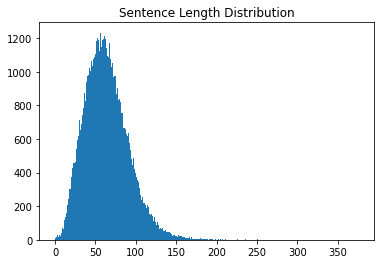

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [ ]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]


Data Size: 76908


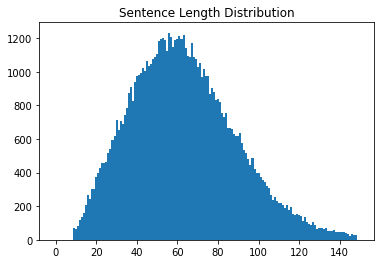

In [ ]:
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1
    
print("Data Size:", len(filtered_corpus))
    
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## 공백기반 토큰화

In [ ]:
def tokenize(corpus): 
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)
    
    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer
    

In [ ]:
# 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [ ]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [ ]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 20: break # idx 는 index

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번
12 : 한
13 : 대해
14 : 것으로
15 : 전
16 : 것이라고
17 : 미국
18 : 있다고
19 : 것을
20 : 중
21 : 미




#### 만일 밝 + 혔다 라고 토큰화했다면 어땠을까요? 
밝 + 히다, 밝 + 다 같은 구절이 등장했을 때, 공통된 어절인 밝 은 하나로 묶여 학습 중에 의미를 파악하기가 수월해지겠죠? 동시에 단어 사전도 효율적으로 축소될 것입니다. 이를 위해 형태소 분석기가 존재합니다!

### 형태소 기반 토큰화 

In [ ]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [ ]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("Mecab Vocab Size:", len(mecab_tokenizer.index_word))

Mecab Vocab Size: 52279


##### cf) Split Vocab Size: 237435

In [ ]:
### Decording Case 1 : tokenizer.sequences_to_texts() 

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

생선 , 뼈 없 는 닭 , 적 은 양 의 치즈 는 샐러드 에 단백질 성분 이 강화 되 는 것 을 도와 준다 .


In [ ]:
# Decording Case 2 : tokenizer.index_word

sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "
    
print(sentence)

생선 , 뼈 없 는 닭 , 적 은 양 의 치즈 는 샐러드 에 단백질 성분 이 강화 되 는 것 을 도와 준다 . 


## 프로젝트: SentencePiece 사용하기 -네이버 영화 리뷰

### Step 1. SentencePiece 설치하기

In [ ]:
# setencepiece에서 제공하는 토큰화를 이용해보겠습니다. 

import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.6.0
1.21.4
3.4.3
0.5.2


In [ ]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

### Step 2. SentencePiece 모델 학습

In [ ]:

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 Jan 17 10:51 korean_spm.model
-rw-r--r-- 1 root root 146213 Jan 17 10:51 korean_spm.vocab


In [ ]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('오늘도에이펠에왔는데잘모르겠다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('오늘도에이펠에왔는데잘모르겠다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[768, 30, 7, 8, 1656, 7, 2715, 864, 6976, 290, 91, 2387, 3]
['▁오늘', '도', '에', '이', '펠', '에', '왔', '는데', '잘', '모', '르', '겠다', '.']
오늘도에이펠에왔는데잘모르겠다.


### Step 3. Tokenizer 함수 작성

In [ ]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [ ]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)


[[1956 5665    5    4 7975 1990    3    0    0    0    0    0    0    0]
 [ 107 1641  101    4    0  417   11    4   14    0 1976    3    3    3]]


In [ ]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['붕어빵 단팥 하나, 슈크림 하나 먹었어요.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[   4 7396   71 7177  647    0  704   13 1802  142 1004  704    4 7975
  1968   71  514    3]
 [ 107 1641  101    4    0  417   11    4   14    0 1976    3    3    3
     0    0    0    0]]


### Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

In [ ]:
path = '../aiffel/sentiment_classification/data'

import pandas as pd

# 데이터를 읽어봅시다. 
train_data = pd.read_table(path +'/ratings_train.txt')
test_data = pd.read_table(path + '/ratings_test.txt')

train = train_data.copy()
test = test_data.copy()
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
#결측치 제거
for i in [train,test]:
    i.dropna(inplace=True)

In [ ]:
#중복 제거
for dataset in [train, test] :
    dataset.drop_duplicates(subset='document', inplace=True)

In [ ]:
#문장 시작점 추가

for dataset in [train, test] :
    dataset.document = dataset.document.apply(lambda x : '<BOS> ' + x)

In [ ]:
#preparation for tokenizing
corpus_train = train.document.values
corpus_test = test.document.values

label_train = train.label.values
label_test = test.label.values

문장의 최단 길이: 7
문장의 최장 길이: 152
문장의 평균 길이: 41


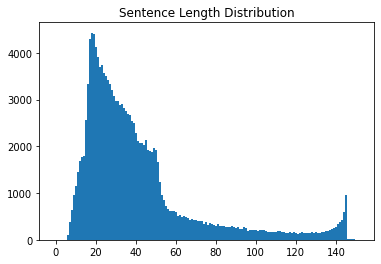

In [ ]:
#train
import numpy as np

min_len = 999
max_len = 0 
sum_len = 0 #초기설정 

for sen in corpus_train:
    length = len(sen)
    if min_len > length: min_len = length # length가 최소값의 길이보다 작으면 최소값은 length
    if max_len < length: max_len = length
    sum_len += length # 하나씩 증가된 데이터를 더함
    
print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(corpus_train))

sentence_length = np.zeros((max_len), dtype=int) #np.zeros 0으로 초기화 된 배열 반환

for sen in corpus_train:
    sentence_length[len(sen)-1] +=1
    
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()


    

문장의 최단 길이: 7
문장의 최장 길이: 150
문장의 평균 길이: 41


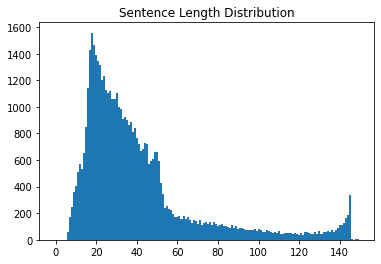

In [ ]:
#Test


min_len = 999
max_len = 0 
sum_len = 0 #초기설정 

for sen in corpus_test:
    length = len(sen)
    if min_len > length: min_len = length # length가 최소값의 길이보다 작으면 최소값은 length
    if max_len < length: max_len = length
    sum_len += length # 하나씩 증가된 데이터를 더함
    
print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(corpus_test))

sentence_length = np.zeros((max_len), dtype=int) #np.zeros 0으로 초기화 된 배열 반환

for sen in corpus_test:
    sentence_length[len(sen)-1] +=1
    
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()


In [ ]:
def tokenize(corpus): 
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)
    
    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer
    

In [ ]:
# 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

NameError: name 'filtered_corpus' is not defined

In [ ]:
def flag_idx(max_len, min_len, corpus) :
    remove_idx = []
    
    for i,sen in enumerate(corpus) :
        length = len(sen)
        if (length > max_len) or (length < min_len) : 
            remove_idx.append(i)
            
    return remove_idx

In [ ]:

max_len = 50
min_len = 3

idx_train = flag_idx(max_len, min_len, corpus_train)
idx_test = flag_idx(max_len, min_len, corpus_test)

print('# of data removing in training set :', len(idx_train))
print('# of data removing in test set :', len(idx_test))

corpus_tr = train.document.values
corpus_ts = test.document.values

label_tr = train.label.values
label_ts = test.label.values

mask_tr = np.ones(corpus_tr.shape,bool)
mask_ts = np.ones(corpus_ts.shape,bool)
mask_tr[idx_tr] = False
mask_ts[idx_ts] = False

corpus_tr_clean = corpus_tr[mask_tr]
corpus_ts_clean = corpus_ts[mask_ts]
label_tr_clean = label_tr[mask_tr]
label_ts_clean = label_ts[mask_ts]

# of data removing in training set : 33556
# of data removing in test set : 11288


NameError: name 'idx_tr' is not defined

In [ ]:
#문장 길이 분포 알아보기 Test

min_len = 999
max_len = 0
sum_len = 0

for sen in corpus_tr_clean :
    length = len(sen)
    if length < min_len : min_len = length
    if length > max_len : max_len = length
    sum_len += length

print('min len :',min_len)
print('max len :',max_len)
print('average len :',sum_len // len(corpus_tr_clean))

sentence_length = np.zeros((max_len), dtype=int)

for sen in corpus_tr_clean:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

NameError: name 'corpus_tr_clean' is not defined

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

NameError: name 'raw' is not defined

In [ ]:
def tokenize(corpus): 
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)
    
    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer
    